In [ ]:
!nvidia-smi

Thu Sep 19 04:24:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.5 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1)
ERROR: No matching distribution found for torch==1.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-8wm8a816
  Runni

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-blzu7mih
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-blzu7mih
  Resolved https://github.com/facebookresearch/detectron2.git to commit ebe8b45437f86395352ab13402ba45b75b4d1ddb
  Preparing metadata (setup.py) ... done
  Using cached pycocotools-2.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.7 MB/s eta 0:00:00
Using cached pycocotools-2

In [ ]:
# COMMON LIBRARIES
import os, random
import json
import cv2
from PIL import Image

from datetime import datetime
from google.colab.patches import cv2_imshow

from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.evaluation import SemSegEvaluator
from detectron2.checkpoint import DetectionCheckpointer
from detectron2 import model_zoo

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RAt60uFdJZ0AP95voxC6")
project = rf.workspace("forest-wildfire").project("forest-file")
version = project.version(2)
dataset = version.download("coco-segmentation")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to forest-file-2 in coco-segmentation:: 100%|██████████| 130/130 [00:00<00:00, 1842.91it/s]


In [ ]:
DATA_SET_NAME = dataset.name.replace(" ", "-")
ANNOTATIONS_FILE_NAME = "_annotations.coco.json"

In [ ]:
# TRAIN SET
TRAIN_DATA_SET_NAME = f"{DATA_SET_NAME}-train"
TRAIN_DATA_SET_IMAGES_DIR_PATH = os.path.join(dataset.location, "train")
TRAIN_DATA_SET_ANN_FILE_PATH = os.path.join(dataset.location, "train", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=TRAIN_DATA_SET_NAME,
    metadata={},
    json_file=TRAIN_DATA_SET_ANN_FILE_PATH,
    image_root=TRAIN_DATA_SET_IMAGES_DIR_PATH
)

# TEST SET
TEST_DATA_SET_NAME = f"{DATA_SET_NAME}-test"
TEST_DATA_SET_IMAGES_DIR_PATH = os.path.join(dataset.location, "test")
TEST_DATA_SET_ANN_FILE_PATH = os.path.join(dataset.location, "test", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=TEST_DATA_SET_NAME,
    metadata={},
    json_file=TEST_DATA_SET_ANN_FILE_PATH,
    image_root=TEST_DATA_SET_IMAGES_DIR_PATH
)

# VALID SET
VALID_DATA_SET_NAME = f"{DATA_SET_NAME}-valid"
VALID_DATA_SET_IMAGES_DIR_PATH = os.path.join(dataset.location, "valid")
VALID_DATA_SET_ANN_FILE_PATH = os.path.join(dataset.location, "valid", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=VALID_DATA_SET_NAME,
    metadata={},
    json_file=VALID_DATA_SET_ANN_FILE_PATH,
    image_root=VALID_DATA_SET_IMAGES_DIR_PATH
)

In [ ]:
metadata = MetadataCatalog.get(TRAIN_DATA_SET_NAME)
dataset_train = DatasetCatalog.get(TRAIN_DATA_SET_NAME)

dataset_entry = dataset_train[0]
image = cv2.imread(dataset_entry["file_name"])

visualizer = Visualizer(
    image[:, :, ::-1],
    metadata=metadata,
    scale=0.8,
    instance_mode=ColorMode.IMAGE_BW
)

out = visualizer.draw_dataset_dict(dataset_entry)
cv2_imshow(out.get_image()[:, :, ::-1])

WARNING [09/19 04:34:45 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/19 04:34:45 d2.data.datasets.coco]: Loaded 108 images in COCO format from /content/forest-file-2/train/_annotations.coco.json


In [ ]:
[
    data_set
    for data_set
    in MetadataCatalog.list()
    if data_set.startswith(DATA_SET_NAME)
]

['forest-file-train', 'forest-file-test', 'forest-file-valid']

In [ ]:
# Configuration for Mask R-CNN
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("forest-file-train",)
cfg.DATASETS.TEST = ("forest-file-valid",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Load pre-trained weights
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # Set your learning rate
cfg.SOLVER.MAX_ITER = 300    # Number of iterations for training
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # Set the batch size for training
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # Number of classes (Debris, Dead tree, Beetle-fire tree)

# Output directory
cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Train the model
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[09/19 04:32:11 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:00, 207MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/19 04:32:12 d2.engine.train_loop]: Starting training from iteration 0


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)


[09/19 04:32:24 d2.utils.events]:  eta: 0:01:34  iter: 19  total_loss: 7.366  loss_cls: 1.324  loss_box_reg: 0.4216  loss_mask: 0.693  loss_rpn_cls: 4.323  loss_rpn_loc: 0.685    time: 0.3561  last_time: 0.3310  data_time: 0.0206  last_data_time: 0.0051   lr: 1.6068e-05  max_mem: 1944M
[09/19 04:32:34 d2.utils.events]:  eta: 0:01:30  iter: 39  total_loss: 4.443  loss_cls: 1.086  loss_box_reg: 0.3504  loss_mask: 0.691  loss_rpn_cls: 1.718  loss_rpn_loc: 0.6452    time: 0.3522  last_time: 0.3427  data_time: 0.0168  last_data_time: 0.0352   lr: 3.2718e-05  max_mem: 1944M
[09/19 04:32:40 d2.utils.events]:  eta: 0:01:20  iter: 59  total_loss: 3.037  loss_cls: 0.825  loss_box_reg: 0.4205  loss_mask: 0.6873  loss_rpn_cls: 0.549  loss_rpn_loc: 0.5863    time: 0.3408  last_time: 0.3405  data_time: 0.0070  last_data_time: 0.0114   lr: 4.9367e-05  max_mem: 1944M
[09/19 04:32:47 d2.utils.events]:  eta: 0:01:14  iter: 79  total_loss: 2.86  loss_cls: 0.6296  loss_box_reg: 0.4055  loss_mask: 0.6819  

In [ ]:
# Load the trained model
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # Set a custom testing threshold
predictor = DefaultPredictor(cfg)

# Evaluate on validation set
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("forest-file-valid", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "forest-file-valid")
inference_on_dataset(trainer.model, val_loader, evaluator)

[09/19 04:35:36 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
WARNING [09/19 04:35:37 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [09/19 04:35:37 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/19 04:35:37 d2.data.datasets.coco]: Loaded 10 images in COCO format from /content/forest-file-2/valid/_annotations.coco.json
[09/19 04:35:37 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/19 04:35:37 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[09/19 04:35:37 d2.data.common]: Serializing 10 elements to byte tensors and concatenating them all ...
[09/19 04:35:37 d2.data.common]: Serialized

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


[09/19 04:35:40 d2.evaluation.evaluator]: Total inference time: 0:00:01.067806 (0.213561 s / iter per device, on 1 devices)
[09/19 04:35:40 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.103587 s / iter per device, on 1 devices)
[09/19 04:35:40 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/19 04:35:40 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[09/19 04:35:40 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[09/19 04:35:40 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[09/19 04:35:40 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[09/19 04:35:40 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[09/19 04:35:40 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP)

OrderedDict([('bbox',
              {'AP': 2.118071120500719,
               'AP50': 6.649424663600813,
               'AP75': 0.7961017513425505,
               'APs': 2.043035646848267,
               'APm': 2.2556906459902644,
               'APl': 2.1020155865413717,
               'AP-forest-with-water': nan,
               'AP-Beetle Tree': 3.8111659266119626,
               'AP-Dead Trees': 2.543047434890196,
               'AP-Debris': 0.0}),
             ('segm',
              {'AP': 1.8930448912056614,
               'AP50': 5.798000183306709,
               'AP75': 0.501097601618952,
               'APs': 1.4261896917481434,
               'APm': 1.8816089284322077,
               'APl': 1.5788484760853376,
               'AP-forest-with-water': nan,
               'AP-Beetle Tree': 3.5391086461658117,
               'AP-Dead Trees': 2.1400260274511718,
               'AP-Debris': 0.0})])

WARNING [09/19 04:36:38 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/19 04:36:38 d2.data.datasets.coco]: Loaded 10 images in COCO format from /content/forest-file-2/valid/_annotations.coco.json


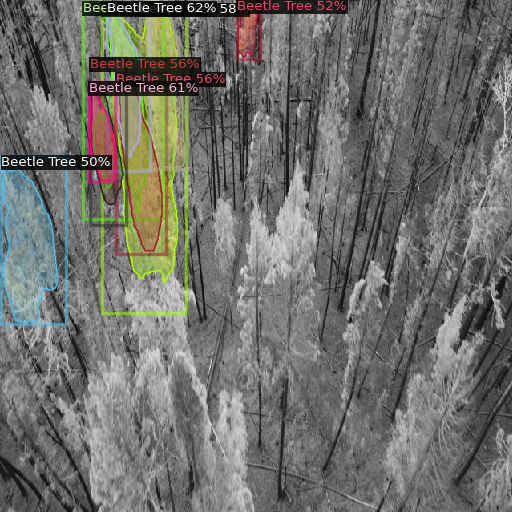

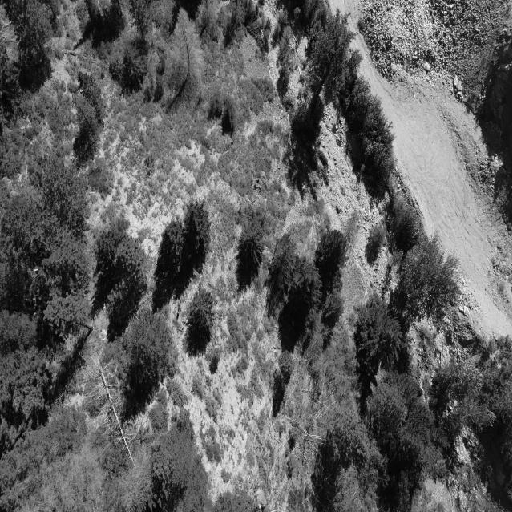

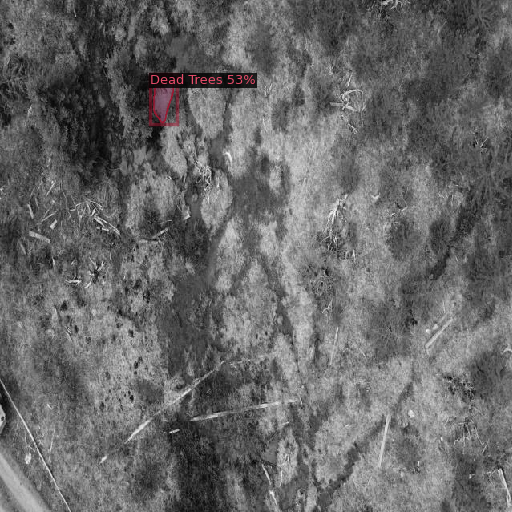

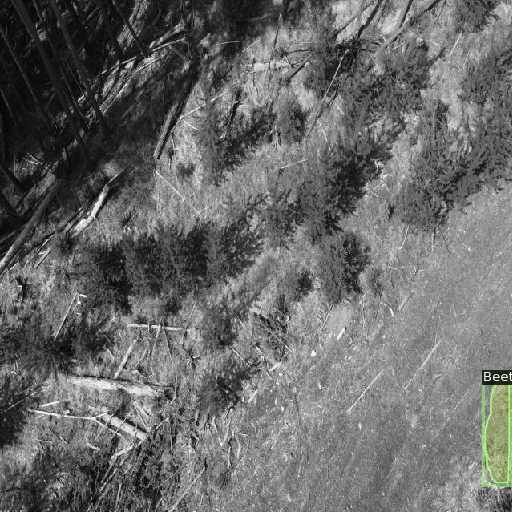

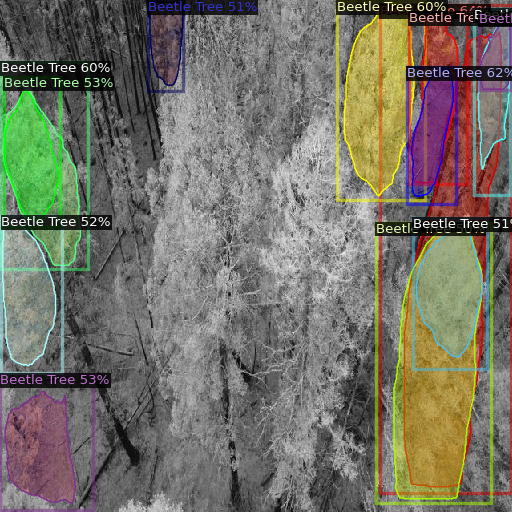

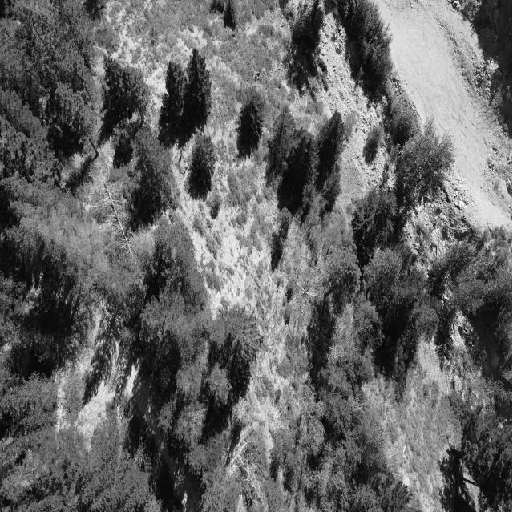

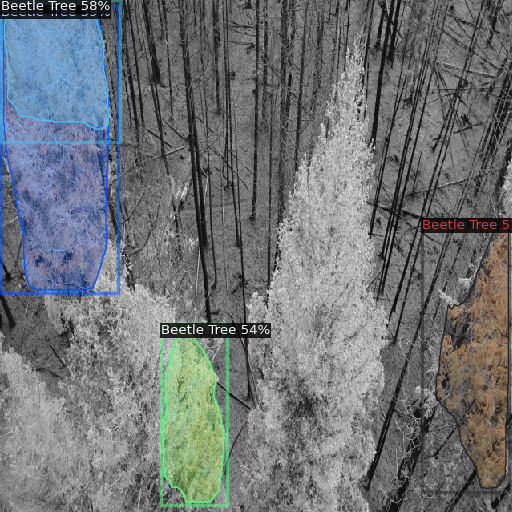

In [ ]:
import random

dataset_valid = DatasetCatalog.get(VALID_DATA_SET_NAME)

# Select 20 random images from the dataset
random.shuffle(dataset_valid)
dataset_valid = dataset_valid[:20]

for d in dataset_valid:
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)

    visualizer = Visualizer(
        img[:, :, ::-1],
        metadata=metadata,
        scale=0.8,
        instance_mode=ColorMode.IMAGE_BW
    )
    out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])